# 基於連接異常因子分析(Connectivity-Based Outlier Factor)

##### 先引入我們需要的packages

In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from scipy.sparse.csgraph import minimum_spanning_tree,shortest_path
from tqdm.notebook import tqdm

# MNIST Dataset

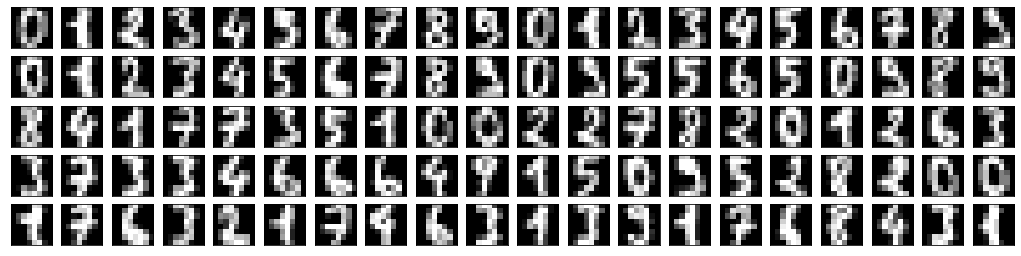

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X=(digits.data/16)
y=digits.target
plt.rcParams["figure.figsize"] = (18,18)
plt.gray() 
for i in range(100):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 

# Principal Component Anlysis

In [3]:
def PCA(X,n_components,N):
    X_center=X-np.mean(X,axis=0)
    W,D,V=np.linalg.svd(X_center.T)
    X_embedded=np.dot(X_center,W[:,:n_components])
    return X_embedded

# Averaging Chaining Distance

In [4]:
k=5
N=X.shape[0]
comp=np.array(range(1,k+1))[::-1]
ac_dist=np.zeros(N)
dist = cdist(X,X,"euclidean")
for i in tqdm(range(N)):
    index=np.argsort(dist[i])[:k+1]
    graph=(dist[index])[:,index]
    mst=minimum_spanning_tree(graph)
    dist_matrix, predecessors = shortest_path(csgraph=mst,directed=False,
                                              indices=0,return_predecessors=True)
    SBN_path=np.zeros(k)
    for j in range(1,k+1):
        SBN_path[j-1]=graph[j,predecessors[j]]
    ac_dist[i]=2*np.sum(comp*SBN_path)/((k+1)*k)

# COF

In [5]:
COF=np.zeros(N)
for i in range(N):
    index=np.argsort(dist[i])[1:k+1]
    COF[i]=ac_dist[i]/np.mean(ac_dist[index])

# Plot

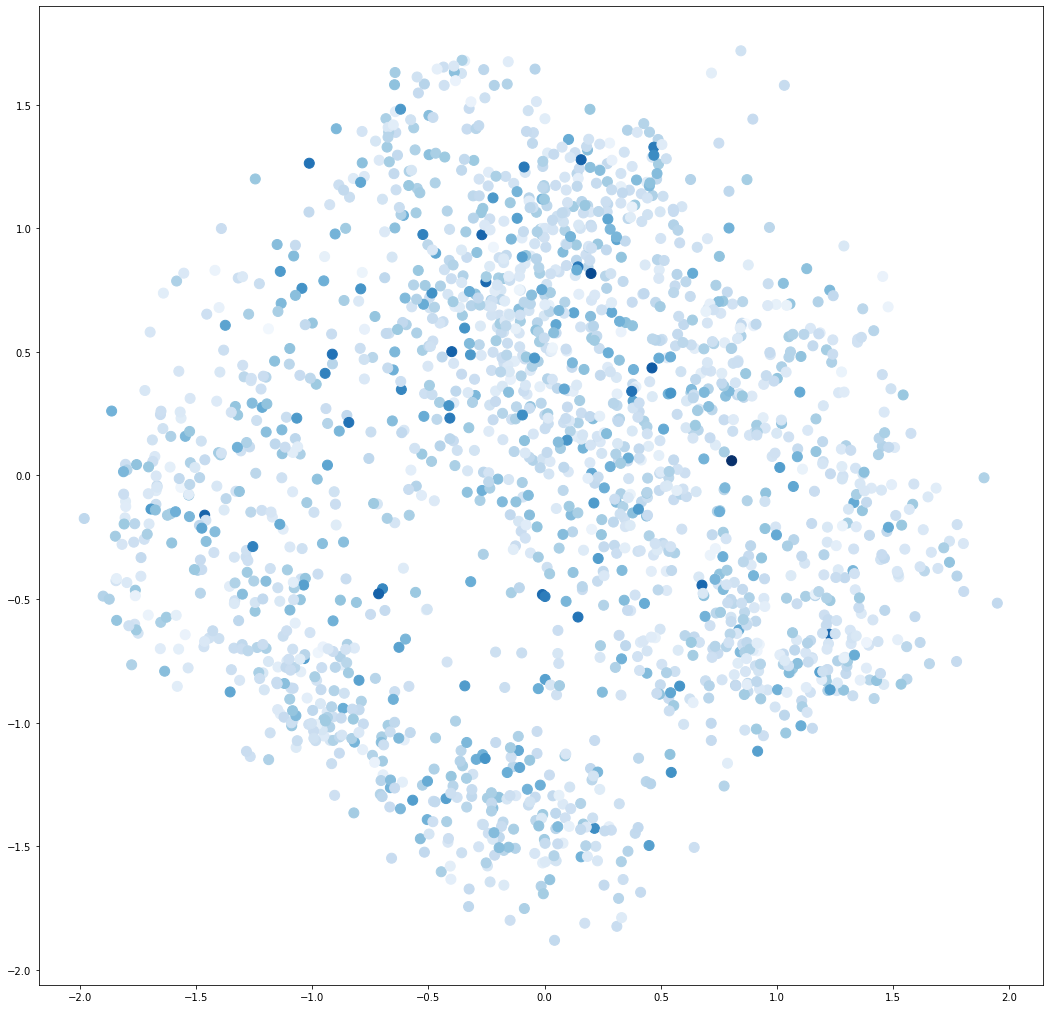

In [6]:
X_emb=PCA(X,2,N)
plt.scatter(X_emb[:,0],X_emb[:,1],c=COF, s=100,cmap='Blues')
plt.show()

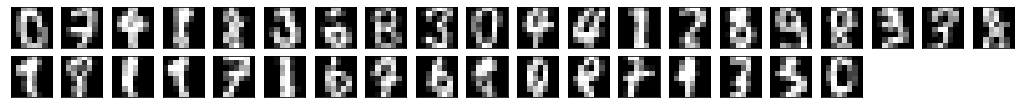

In [7]:
plt.rcParams["figure.figsize"] = (18,18)
outlier_index=np.array(np.where(COF>1.3)).ravel()
plt.gray() 
for i in range(len(outlier_index)):
    plt.subplot(20, 20, i + 1)
    plt.imshow(digits.images[outlier_index[i]], cmap=plt.cm.gray, vmax=16, interpolation='nearest')
    plt.xticks(())
    plt.yticks(())
plt.show() 